In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/content/glass.csv')

In [3]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=6cbc28734eb30eea7be556bdeae857c72298727da2b6c1970249b7ca8fc058be
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [7]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title='Pandas Profiling Report')
profile.to_file('Report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 10/10 [00:00<00:00, 68.03it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [39]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [8]:
df.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


In [9]:
df['Type'].unique()

array([1, 2, 3, 5, 6, 7])

In [10]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

##Random Forest Classifier

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score , classification_report

In [13]:
df.shape

(214, 10)

In [14]:
X = df.drop('Type', axis=1)
y = df['Type']

In [20]:
# Parameter grid for tuning
param = {
    'n_estimators': [10, 50, 100, 200, 500],
    'max_depth': [None, 5, 10, 20, 30],
    'bootstrap': [True, False]
}

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# GridSearch with 5-fold CV
search = GridSearchCV(RandomForestClassifier(), param, cv=5, scoring='accuracy', n_jobs=-1)
search.fit(X_train, y_train)


print("Accuracy Score:", accuracy_score(y_test, search.predict(X_test)))
print("Best Parameters:", search.best_params_)
print("Best CV Score (Accuracy):", search.best_score_)


Accuracy Score: 0.8372093023255814
Best Parameters: {'bootstrap': True, 'max_depth': 30, 'n_estimators': 500}
Best CV Score (Accuracy): 0.760672268907563


##KNN

In [21]:
#for knn we need to scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [28]:
#for best n-Neighbors
import math
a = df.shape[0]
b = math.sqrt(a)
print(b)

14.628738838327793


In [29]:
from sklearn.neighbors import KNeighborsClassifier

#to find optimized value of k
acc = []
max =0;
for i in range(1,16):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    acc.append(accuracy_score(y_test,pred))
    if max <= accuracy_score(y_test,pred):
        max = accuracy_score(y_test,pred)
        k = i
print(k)
print(max)

3
0.7674418604651163


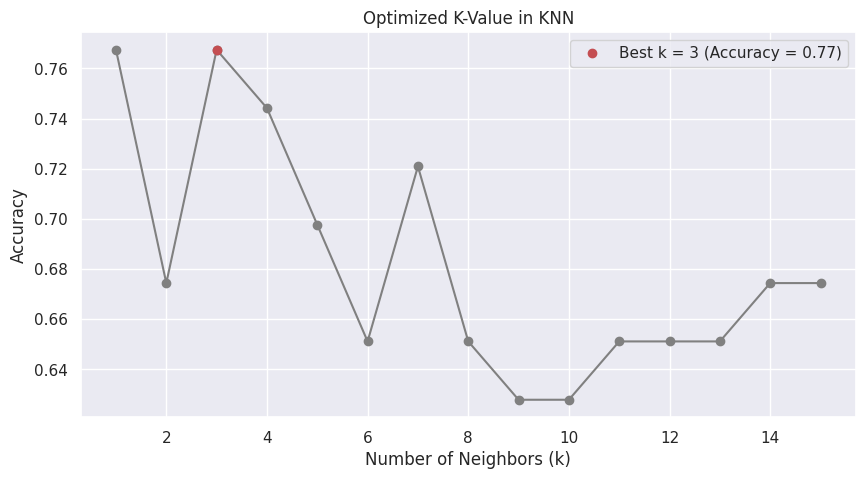

In [38]:
best_k = k
best_acc = max

plt.figure(figsize=(10, 5))
plt.plot(range(1, 16), acc, marker='o', color='gray')
plt.plot(best_k, best_acc, 'ro', label=f'Best k = {best_k} (Accuracy = {best_acc:.2f})')
plt.title('Optimized K-Value in KNN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


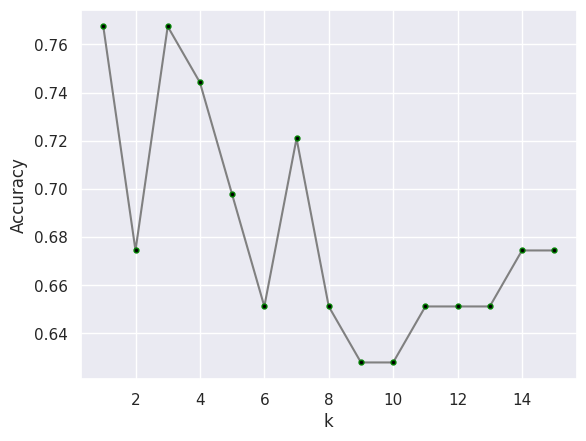

In [32]:
#visiualize
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.plot(range(1,16),acc,c="grey",marker=".",ms=7,mfc="black",mec="green")
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

In [35]:
#make model
X = df.drop('Type', axis=1)
y = df['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
print("Accurracy : ",accuracy_score(y_test, rfc.predict(X_test)))

Accurracy :  0.8372093023255814


In [36]:
import joblib
joblib.dump(rfc,'model.pkl')

['model.pkl']